In [5]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
!pip install librosa

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 4.4 MB/s eta 0:00:00


In [35]:
train_csv_path = r"C:\\Users\\ASUS\\Downloads\\shl-intern-hiring-assessment\\dataset\\train.csv"
test_csv_path = r"C:\\Users\\ASUS\\Downloads\\shl-intern-hiring-assessment\\dataset\\test.csv"
audio_train_dir = r"C:\\Users\\ASUS\\Downloads\\shl-intern-hiring-assessment\\dataset\\audios_train"
audio_test_dir = r"C:\\Users\\ASUS\\Downloads\\shl-intern-hiring-assessment\\dataset\\audios_test"


In [37]:
# Load datasets
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [39]:
# Extract audio features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

In [41]:
# Process training data
train_features = []
train_labels = []

In [43]:
# Check column names
print("Train Columns:", train_df.columns)
print("Test Columns:", test_df.columns)

Train Columns: Index(['filename', 'label'], dtype='object')
Test Columns: Index(['filename'], dtype='object')


In [45]:
for index, row in train_df.iterrows():
    file_path = os.path.join(audio_train_dir, row["filename"])
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    features = extract_features(file_path)
    train_features.append(features)
    train_labels.append(row["label"])

train_features = np.array(train_features)
train_labels = np.array(train_labels)

In [49]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)


In [51]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [53]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
# Evaluate model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"MSE: {mse}, R2 Score: {r2}")

MSE: 1.1786772471910112, R2 Score: 0.13532739291502693


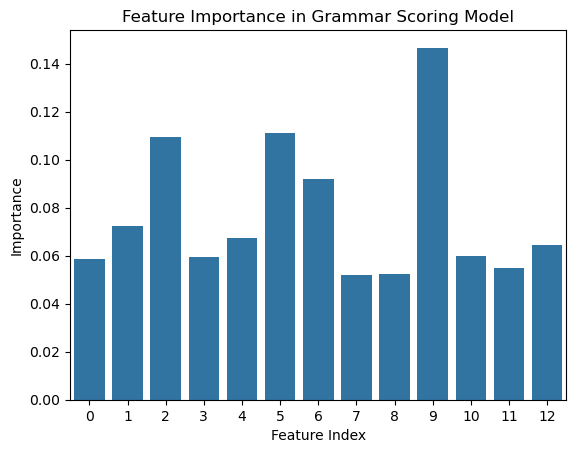

In [57]:
# Feature importance
feature_importances = model.feature_importances_
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in Grammar Scoring Model")
plt.show()

In [59]:
# Process test data
test_features = []

for index, row in test_df.iterrows():
    file_path = os.path.join(audio_test_dir, row["filename"])
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    features = extract_features(file_path)
    test_features.append(features)

In [61]:
if test_features:
    test_features = np.array(test_features)
    test_features = scaler.transform(test_features)

    # Predict on test set
    test_predictions = model.predict(test_features)
    test_df = test_df.iloc[:len(test_predictions)]
    test_df["predicted_score"] = test_predictions

    # Save submission
    test_df.to_csv("submission.csv", index=False)
    print("Submission saved successfully.")
else:
    print("No test features were processed due to missing files.")

Submission saved successfully.
